In [1]:
using Revise    
include("../../src/pure/Rep.jl")
using Plots
using DataFrames, CSV
using Peaks

In [4]:

# 固定温度，扫描 mu_B
Ts = 300.0:-2.0:10.0
mu_B = 10.0


ints = get_nodes(256;nodes2=256)

data = zeros(length(Ts), 7)  # T muB P chimu chi2mu chi3mu chi4mu
sol = zeros(length(Ts), 6)
sol[:, 1] = Ts


X0 = [-0.01, -0.01, -0.20, 0.8, 0.8]
P0 = 20.1235

for (i, T) in enumerate(Ts)
    println("Calculating T = ", T, " MeV; Step ", i, " of ", length(Ts))
    NewX = Tmu(T/hc, mu_B/hc, X0, ints)
    data[i, :] = Fluctuations(NewX*1.0001, T/hc, mu_B/hc, ints)
    sol[i, 2:6] = NewX
    X0 = NewX
end


Calculating T = 300.0 MeV; Step 1 of 146
Calculating T = 298.0 MeV; Step 2 of 146
Calculating T = 296.0 MeV; Step 3 of 146
Calculating T = 294.0 MeV; Step 4 of 146
Calculating T = 292.0 MeV; Step 5 of 146
Calculating T = 290.0 MeV; Step 6 of 146
Calculating T = 288.0 MeV; Step 7 of 146
Calculating T = 286.0 MeV; Step 8 of 146
Calculating T = 284.0 MeV; Step 9 of 146
Calculating T = 282.0 MeV; Step 10 of 146
Calculating T = 280.0 MeV; Step 11 of 146
Calculating T = 278.0 MeV; Step 12 of 146
Calculating T = 276.0 MeV; Step 13 of 146
Calculating T = 274.0 MeV; Step 14 of 146
Calculating T = 272.0 MeV; Step 15 of 146
Calculating T = 270.0 MeV; Step 16 of 146
Calculating T = 268.0 MeV; Step 17 of 146
Calculating T = 266.0 MeV; Step 18 of 146
Calculating T = 264.0 MeV; Step 19 of 146
Calculating T = 262.0 MeV; Step 20 of 146
Calculating T = 260.0 MeV; Step 21 of 146
Calculating T = 258.0 MeV; Step 22 of 146
Calculating T = 256.0 MeV; Step 23 of 146
Calculating T = 254.0 MeV; Step 24 of 146
C

In [11]:
Ts = sol[:, 1]
chimu = data[:, 4]
chi2mu2 = data[:, 5]
chi3mu3 = data[:, 6]
chi4mu4 = data[:, 7]

146-element Vector{Float64}:
 0.02423311033934286
 0.024512537154417327
 0.024793967370422353
 0.025076983845251106
 0.02536110209890996
 0.025645766401641117
 0.025930346682006514
 0.0262141365328049
 0.02649635261791653
 0.02677613579980162
 ⋮
 2.3183780617299434e-18
 7.639163939116896e-20
 1.3426115901162455e-21
 1.041335211541222e-23
 2.7103495792120435e-26
 1.569527339905638e-29
 1.0598201812582153e-33
 2.841712773982797e-39
 4.1053665947016125e-47

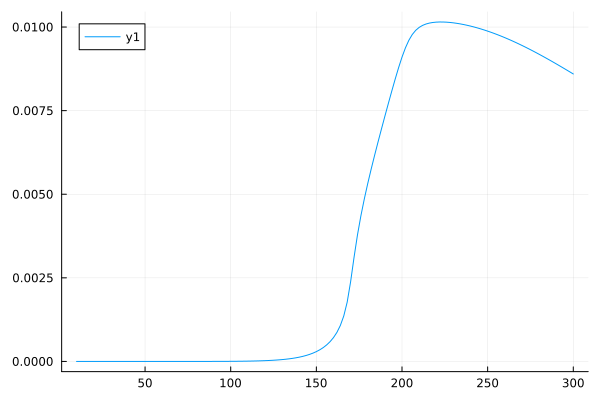

In [12]:
plot(Ts, chimu)

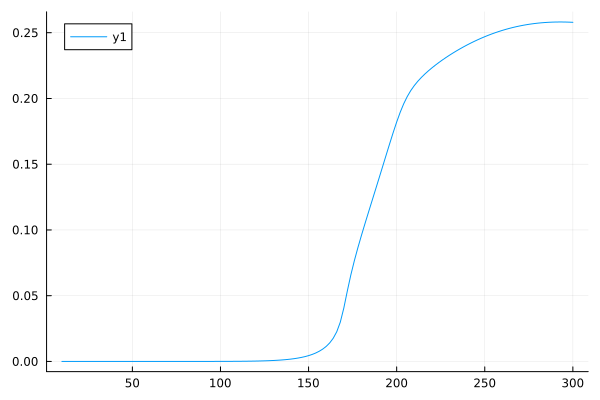

In [13]:
plot(Ts, chi2mu2)

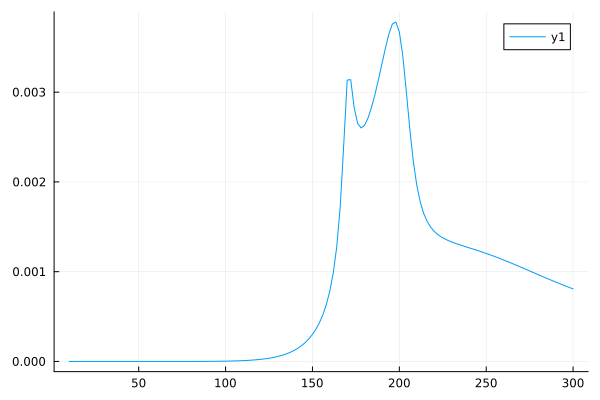

In [14]:
plot(Ts, chi3mu3)

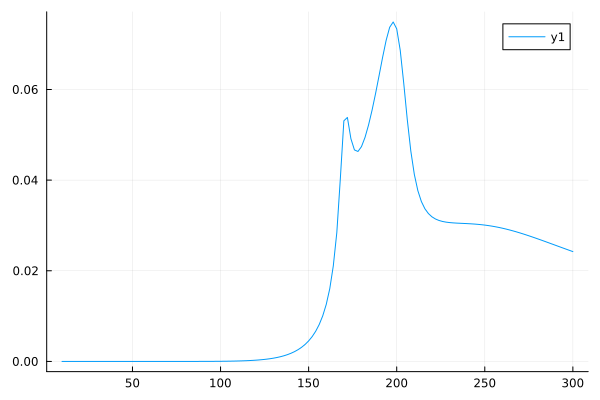

In [15]:
plot(Ts, chi4mu4)

In [3]:
include("derv.jl")

# 固定温度，扫描 mu_B
T = 200.0
mu_Bs = collect(0.0:3.0:1200.0)  # mu_B 从 0 到 50 MeV，步长 1.0
eB = 0.13
q = 1.0001


ints = get_nodes(256;nodes2=256)


lens = length(mu_Bs)
data = zeros(lens, 7)  # T muB P chimu chi2mu chi3mu chi4mu
data[:, 1] .= T
data[:, 2] .= mu_Bs
P_array = zeros(length(mu_Bs))
n_points = length(mu_Bs)
X0 = [-0.5, -0.5, -0.80, 0.8, 0.8]
P0 = 20.1235


for (i, mu_B) in enumerate(mu_Bs)
    if i % 10 == 0
        println("  mu_B = $mu_B MeV; Step $i of $n_points")
    end
    
    # 求解场方程
    NewX = Tmu(T/hc, mu_B/hc, X0, ints)
    phi = NewX[1:3]
    Phi1 = NewX[4]
    Phi2 = NewX[5]
    P = -Omega(phi, Phi1, Phi2, T/hc, mu_B/hc, ints)
    P_array[i] = P
    
    X0 = NewX

end

# 使用 derivation! 计算各阶导数
dP_dmu = zeros(n_points)      # 一阶导数 ∂P/∂μ
d2P_dmu2 = zeros(n_points)    # 二阶导数 ∂²P/∂μ²
d3P_dmu3 = zeros(n_points)    # 三阶导数 ∂³P/∂μ³
d4P_dmu4 = zeros(n_points)    # 四阶导数 ∂⁴P/∂μ⁴

derivation!(P_array, mu_Bs, dP_dmu)       # P → ∂P/∂μ
derivation!(dP_dmu, mu_Bs, d2P_dmu2)      # ∂P/∂μ → ∂²P/∂μ²
derivation!(d2P_dmu2, mu_Bs, d3P_dmu3)    # ∂²P/∂μ² → ∂³P/∂μ³
derivation!(d3P_dmu3, mu_Bs, d4P_dmu4)    # ∂³P/∂μ³ → ∂⁴P/∂μ⁴

data[:, 3] = P_array / (T/hc)^4
data[:, 4] = dP_dmu / (T/hc)^3
data[:, 5] = d2P_dmu2 / (T/hc)^2
data[:, 6] = d3P_dmu3 / (T/hc)
data[:, 7] = d4P_dmu4
df2 = DataFrame(data, [:T, :muB, :P, :chimu, :chi2mu, :chi3mu, :chi4mu])
CSV.write("FLU_test_T200.csv", df2)



  mu_B = 27.0 MeV; Step 10 of 401
  mu_B = 57.0 MeV; Step 20 of 401
  mu_B = 87.0 MeV; Step 30 of 401
  mu_B = 117.0 MeV; Step 40 of 401
  mu_B = 147.0 MeV; Step 50 of 401
  mu_B = 177.0 MeV; Step 60 of 401
  mu_B = 207.0 MeV; Step 70 of 401
  mu_B = 237.0 MeV; Step 80 of 401
  mu_B = 267.0 MeV; Step 90 of 401
  mu_B = 297.0 MeV; Step 100 of 401
  mu_B = 327.0 MeV; Step 110 of 401
  mu_B = 357.0 MeV; Step 120 of 401
  mu_B = 387.0 MeV; Step 130 of 401
  mu_B = 417.0 MeV; Step 140 of 401
  mu_B = 447.0 MeV; Step 150 of 401
  mu_B = 477.0 MeV; Step 160 of 401
  mu_B = 507.0 MeV; Step 170 of 401
  mu_B = 537.0 MeV; Step 180 of 401
  mu_B = 567.0 MeV; Step 190 of 401
  mu_B = 597.0 MeV; Step 200 of 401
  mu_B = 627.0 MeV; Step 210 of 401
  mu_B = 657.0 MeV; Step 220 of 401
  mu_B = 687.0 MeV; Step 230 of 401
  mu_B = 717.0 MeV; Step 240 of 401
  mu_B = 747.0 MeV; Step 250 of 401
  mu_B = 777.0 MeV; Step 260 of 401
  mu_B = 807.0 MeV; Step 270 of 401
  mu_B = 837.0 MeV; Step 280 of 401
  mu

"FLU_test_T200.csv"